In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../data/processed_21_02_2020/features.csv")

In [6]:
df.head()

,max_frequency,max_power_spectrum,power_bandwidth,fft_mean_coeff,spectral_spread,fundamental_frequency,location
0,1013.843352,1013.843352,642.0,3334.354215,292.468097,8.014572,41
1,1021.857923,1021.857923,8.0,9510.902763,349.150455,6.010929,33
2,1041.894353,1041.894353,18.0,2460.242807,286.189561,8.014572,23
3,943.715847,943.715847,18.0,2304.224559,260.191365,8.014572,17
4,989.799636,989.799636,536.0,51.048255,264.494990,8.014572,10


In [17]:
# PCA
from sklearn.decomposition import PCA
X = df.drop(['location'], axis=1).values
pca = PCA(n_components=1)
reduced_feats = pca.fit_transform(X)

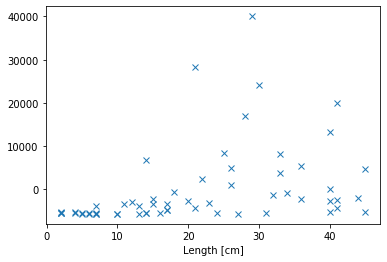

In [109]:
plt.plot(df.location, reduced_feats, 'x')
plt.xlabel('Length [cm]')
plt.show()

In [27]:
df.iloc[1::5]

,max_frequency,max_power_spectrum,power_bandwidth,fft_mean_coeff,spectral_spread,fundamental_frequency,location
1,1021.857923,1021.857923,8.0,9510.902763,349.150455,6.010929,33
6,1011.839709,1011.839709,566.0,337.613791,290.353435,2.003643,4
11,1017.850638,1017.850638,10.0,13960.043789,334.347911,6.010929,33
16,1001.821494,1001.821494,464.0,46.622419,276.872555,2.003643,10
21,1003.825137,1003.825137,12.0,19011.456717,300.818967,6.010929,40
26,983.788707,983.788707,12.0,5134.178338,296.621928,6.010929,18
31,1005.828780,1005.828780,542.0,250.176524,282.603715,2.003643,24
36,979.781421,979.781421,674.0,287.255452,243.864540,2.003643,5
41,993.806922,993.806922,460.0,6677.745980,284.184610,6.010929,26
46,1017.850638,1017.850638,12.0,7984.661118,311.801073,6.010929,22


In [53]:
all_indx = np.arange(0,60)
test_indx = all_indx[1::5]
train_indx = []
for i in all_indx:
    if not (i in test_indx):
        train_indx.append(i)
train_indx = np.array(train_indx)
len(test_indx), len(train_indx)

(12, 48)

In [73]:
X_test = df.drop(['location'], axis=1).iloc[test_indx].values
X_train = df.drop(['location'], axis=1).iloc[train_indx].values

y_test = df['location'].iloc[test_indx].values
y_train = df['location'].iloc[train_indx].values

In [75]:
X_test, y_test

(array([[1.02185792e+03, 1.02185792e+03, 8.00000000e+00, 9.51090276e+03,
         3.49150455e+02, 6.01092896e+00],
        [1.01183971e+03, 1.01183971e+03, 5.66000000e+02, 3.37613791e+02,
         2.90353435e+02, 2.00364299e+00],
        [1.01785064e+03, 1.01785064e+03, 1.00000000e+01, 1.39600438e+04,
         3.34347911e+02, 6.01092896e+00],
        [1.00182149e+03, 1.00182149e+03, 4.64000000e+02, 4.66224188e+01,
         2.76872555e+02, 2.00364299e+00],
        [1.00382514e+03, 1.00382514e+03, 1.20000000e+01, 1.90114567e+04,
         3.00818967e+02, 6.01092896e+00],
        [9.83788707e+02, 9.83788707e+02, 1.20000000e+01, 5.13417834e+03,
         2.96621928e+02, 6.01092896e+00],
        [1.00582878e+03, 1.00582878e+03, 5.42000000e+02, 2.50176524e+02,
         2.82603715e+02, 2.00364299e+00],
        [9.79781421e+02, 9.79781421e+02, 6.74000000e+02, 2.87255452e+02,
         2.43864540e+02, 2.00364299e+00],
        [9.93806922e+02, 9.93806922e+02, 4.60000000e+02, 6.67774598e+03,
       

In [124]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
clf = LogisticRegression(max_iter =20000,random_state=10)

In [125]:
clf.fit(X_train, y_train)

/home/tasbolat/tas_python_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=20000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
y_pred = clf.predict(X_test)

In [127]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

148.5

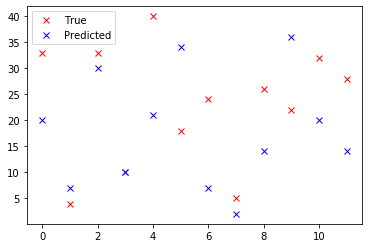

In [128]:
plt.plot(y_test, 'rx', label='True')
plt.plot(y_pred, 'bx', label='Predicted')
plt.legend()
plt.show()

In [129]:
# logistic regression
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
y_pred = clf.predict(X_test)
mean_squared_error(y_test, y_pred)

55.23802683679946

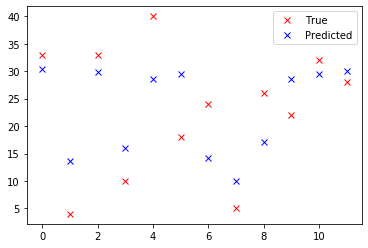

In [131]:
plt.plot(y_test, 'rx', label='True')
plt.plot(y_pred, 'bx', label='Predicted')
plt.legend()
plt.show()